# Regresión Lineal: California Housing Prices

### Docente: M.Sc. Richard Fernández
#### INTEGRANTES:
###### HUERTA PAHUACHO, Junior Alfredo
###### ZAYERZ CALVO, Luis Alberto


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [2]:
!wget https://raw.githubusercontent.com/JuniorAlfredoHuerta/MetodData/38d4cb414c2603dfda0684f038bea8719970b3d7/housing.csv

--2023-06-28 23:27:43--  https://raw.githubusercontent.com/JuniorAlfredoHuerta/MetodData/38d4cb414c2603dfda0684f038bea8719970b3d7/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.01s   

2023-06-28 23:27:43 (118 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [3]:
data = pd.read_csv('housing.csv')

In [4]:
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


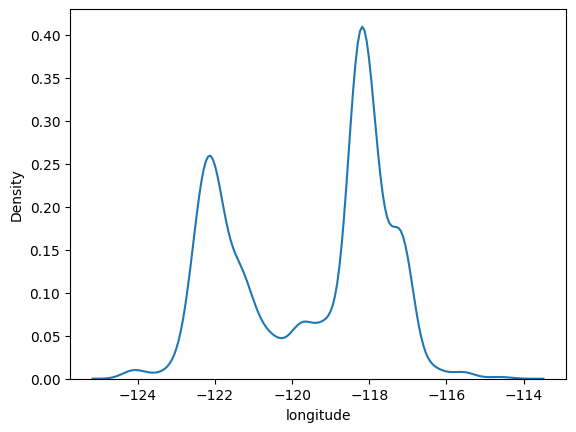

In [5]:
sns.kdeplot(data.longitude)
plt.show()

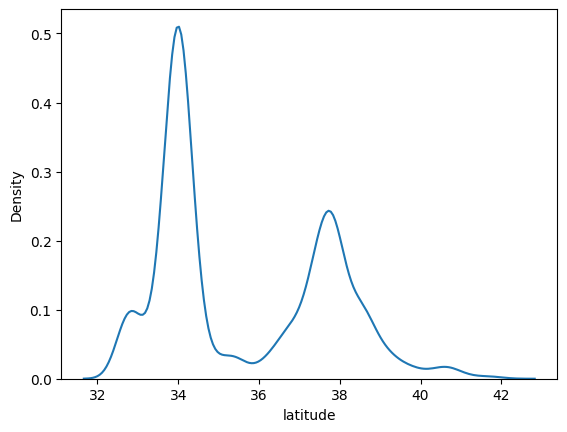

In [6]:
sns.kdeplot(data.latitude)
plt.show()

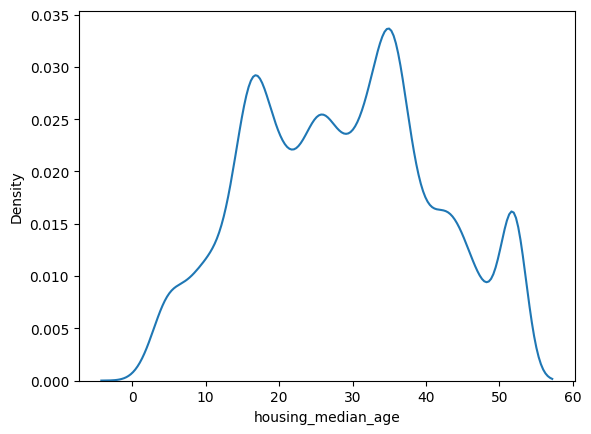

In [7]:
sns.kdeplot(data.housing_median_age)
plt.show()

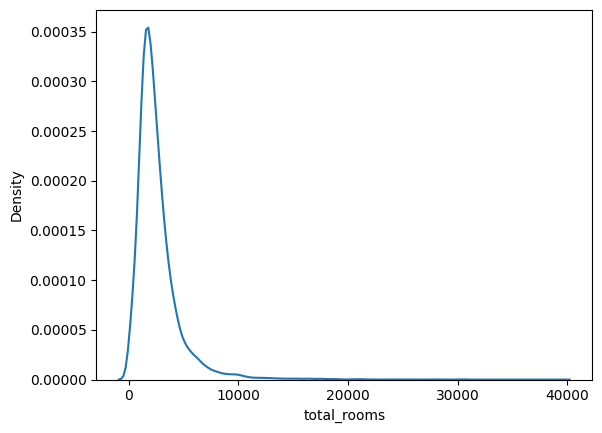

In [8]:
sns.kdeplot(data.total_rooms)
plt.show()

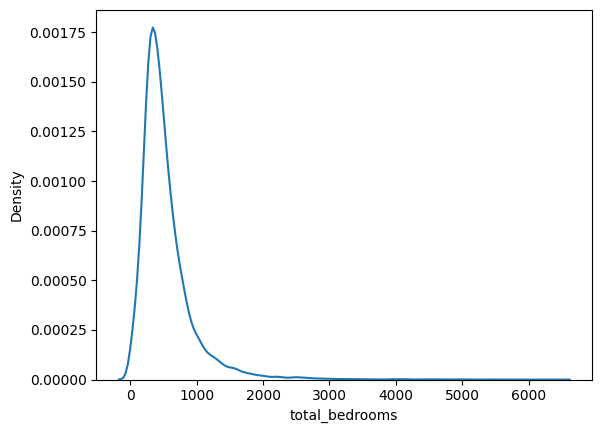

In [9]:
sns.kdeplot(data.total_bedrooms)
plt.show()

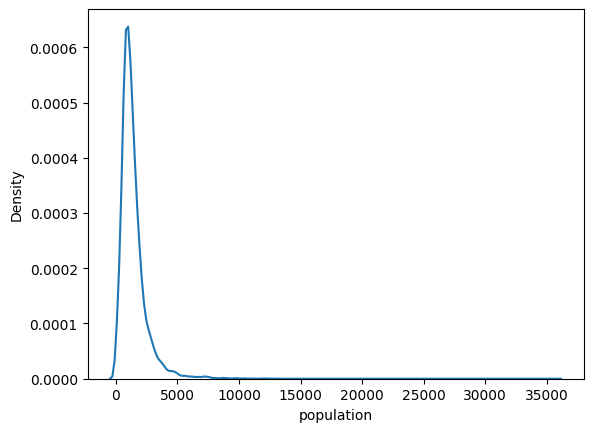

In [10]:
sns.kdeplot(data.population)
plt.show()

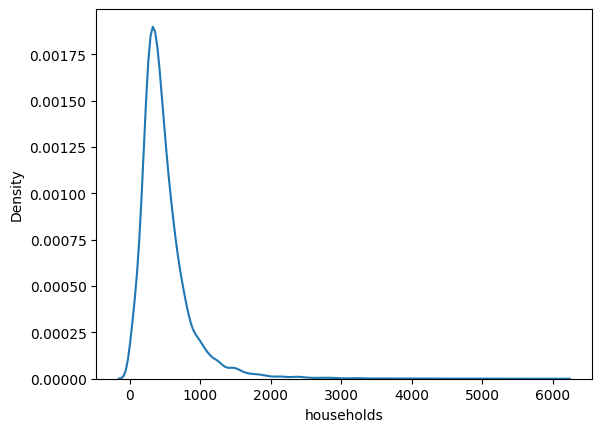

In [11]:
sns.kdeplot(data.households)
plt.show()

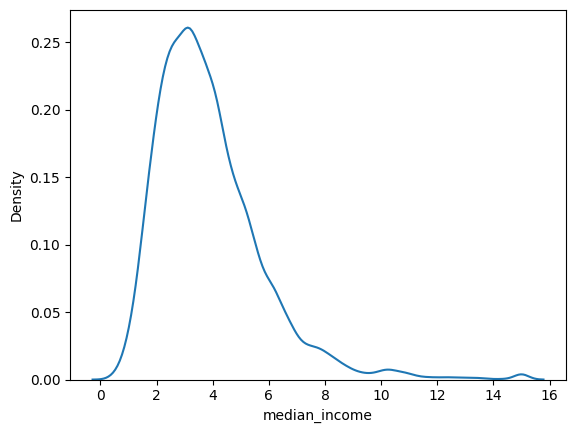

In [12]:
sns.kdeplot(data.median_income)
plt.show()

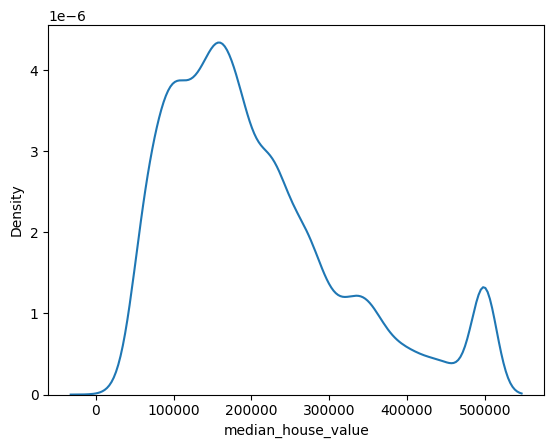

In [13]:
sns.kdeplot(data.median_house_value)
plt.show()

In [14]:
#Prueba de normalidad (Shapiro)
#Ho: La variable se aproxima a una distribución normal
#Ha: La variable NO se aproxima a una distribución normal

#Si p-value < 5%, se rechaza la hipótesis nula (Ho),
#al 95% de confianza, la variable NO se aproxima a una distribución normal.

#Si p-value > 5%, no se rechaza la hipótesis nula (Ho),
#al 95% de confianza, la variable se aproxima a una distribución normal.

In [15]:
#Prueba de normalidad
ss.shapiro(data['longitude'])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8969986438751221, pvalue=0.0)

In [16]:
#Prueba de normalidad
ss.shapiro(data['latitude'])

ShapiroResult(statistic=0.8771096467971802, pvalue=0.0)

In [17]:
#Prueba de normalidad
ss.shapiro(data['housing_median_age'])

ShapiroResult(statistic=0.9782373905181885, pvalue=0.0)

In [18]:
#Prueba de normalidad
ss.shapiro(data['total_rooms'])

ShapiroResult(statistic=0.6952450275421143, pvalue=0.0)

In [19]:
#Prueba de normalidad
ss.shapiro(data['total_bedrooms'])

ShapiroResult(statistic=nan, pvalue=1.0)

In [20]:
#Prueba de normalidad
ss.shapiro(data['population'])

ShapiroResult(statistic=0.7133156657218933, pvalue=0.0)

In [21]:
#Prueba de normalidad
ss.shapiro(data['households'])

ShapiroResult(statistic=0.7456488609313965, pvalue=0.0)

In [22]:
#Prueba de normalidad
ss.shapiro(data['median_income'])

ShapiroResult(statistic=0.8932322859764099, pvalue=0.0)

In [23]:
#Prueba de normalidad
ss.shapiro(data['median_house_value'])

ShapiroResult(statistic=0.9123021364212036, pvalue=0.0)

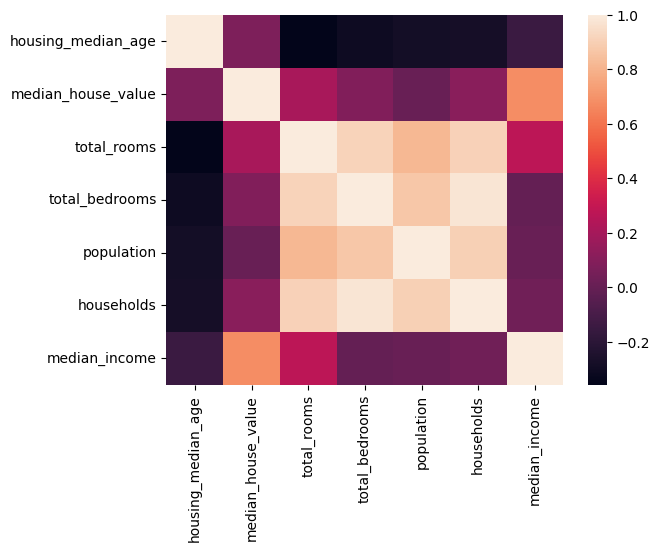

In [24]:
#Heatmap
sns.heatmap(data.loc[:,['housing_median_age','median_house_value','total_rooms', 'total_bedrooms','population', 'households','median_income']].corr(method = "spearman"))
plt.show()

In [25]:
data.loc[:,['housing_median_age','median_house_value','total_rooms', 'total_bedrooms','population', 'households','median_income']].corr(method = "spearman")

,housing_median_age,median_house_value,total_rooms,total_bedrooms,population,households,median_income
housing_median_age,1.000000,0.074855,-0.357162,-0.306544,-0.283879,-0.281989,-0.147308
median_house_value,0.074855,1.000000,0.205952,0.086259,0.003839,0.112737,0.676778
total_rooms,-0.357162,0.205952,1.000000,0.915021,0.816185,0.906734,0.271321
total_bedrooms,-0.306544,0.086259,0.915021,1.000000,0.870937,0.975627,-0.006196
population,-0.283879,0.003839,0.816185,0.870937,1.000000,0.903872,0.006268
households,-0.281989,0.112737,0.906734,0.975627,0.903872,1.000000,0.030305
median_income,-0.147308,0.676778,0.271321,-0.006196,0.006268,0.030305,1.000000


In [26]:
#Supuesto 1

#linealidad => p-value < 5%

#Conclusión
#Como p-value < 5%, se rechaza la hipótesis nula (Ho),
#al 95% de confianza, existe correlación entre las variables

#Al 95% de confianza, se cumple la linealidad entre la variables dependiente (target) vs las variables
#independientes (drivers).

In [27]:
#Prueba de Correlación

#Si p-value < 5%, se rechaza la hipótesis nula (Ho),
#al 95% de confianza, existe correlación entre las variables.


In [28]:
ss.spearmanr(data['median_house_value'],data['housing_median_age'])

SignificanceResult(statistic=0.07485485302251019, pvalue=4.844329494934632e-27)

In [29]:
ss.spearmanr(data['median_house_value'],data['total_rooms'])

SignificanceResult(statistic=0.20595200847635764, pvalue=1.5614222609650307e-196)

In [30]:
ss.spearmanr(data['median_house_value'],data['total_bedrooms'])

SignificanceResult(statistic=nan, pvalue=nan)

In [31]:
ss.spearmanr(data['median_house_value'],data['population'])

SignificanceResult(statistic=0.0038387551282557182, pvalue=0.5813126917160487)

In [32]:
ss.spearmanr(data['median_house_value'],data['households'])

SignificanceResult(statistic=0.11273702236497356, pvalue=2.3324891394863148e-59)

In [33]:
ss.spearmanr(data['housing_median_age'],data['total_rooms'])

SignificanceResult(statistic=-0.3571622692099669, pvalue=0.0)

In [34]:
ss.spearmanr(data['housing_median_age'],data['median_income'])

SignificanceResult(statistic=-0.1473079012915886, pvalue=1.8126029336503048e-100)

In [35]:
ss.spearmanr(data['housing_median_age'],data['population'])

SignificanceResult(statistic=-0.28387937837293237, pvalue=0.0)

In [36]:
ss.spearmanr(data['housing_median_age'],data['households'])

SignificanceResult(statistic=-0.28198919208422246, pvalue=0.0)

In [37]:
ss.spearmanr(data['total_rooms'],data['total_bedrooms'])

SignificanceResult(statistic=nan, pvalue=nan)

In [38]:
ss.spearmanr(data['total_rooms'],data['population'])

SignificanceResult(statistic=0.8161850291296634, pvalue=0.0)

In [39]:
ss.spearmanr(data['total_rooms'],data['households'])

SignificanceResult(statistic=0.9067344916774163, pvalue=0.0)

In [40]:
ss.spearmanr(data['total_rooms'],data['median_income'])

SignificanceResult(statistic=0.2713206802912169, pvalue=0.0)

In [41]:
ss.spearmanr(data['total_rooms'],data['total_rooms'])

SignificanceResult(statistic=1.0, pvalue=0.0)

In [42]:
ss.spearmanr(data['total_bedrooms'],data['population'])

SignificanceResult(statistic=nan, pvalue=nan)

In [43]:
ss.spearmanr(data['total_bedrooms'],data['households'])

SignificanceResult(statistic=nan, pvalue=nan)

In [44]:
ss.spearmanr(data['total_bedrooms'],data['median_income'])

SignificanceResult(statistic=nan, pvalue=nan)

In [45]:
ss.spearmanr(data['population'],data['households'])

SignificanceResult(statistic=0.9038719229078769, pvalue=0.0)

In [46]:
ss.spearmanr(data['population'],data['median_income'])

SignificanceResult(statistic=0.006267743380244248, pvalue=0.36789801384068177)

In [47]:
ss.spearmanr(data['median_income'],data['households'])

SignificanceResult(statistic=0.030304929624452134, pvalue=1.333509637934352e-05)

In [48]:
#Supuesto 5

#presencia de Multicolinealidad => p-value < 5%

#Conclusión
#Como p-value < 5%, se rechaza la hipótesis nula (Ha),
#al 95% de confianza, existe correlación entre las variables independientes (drivers):


#Al 95% de confianza, no existe presencia de multicolinealidad entre las variables independientes.

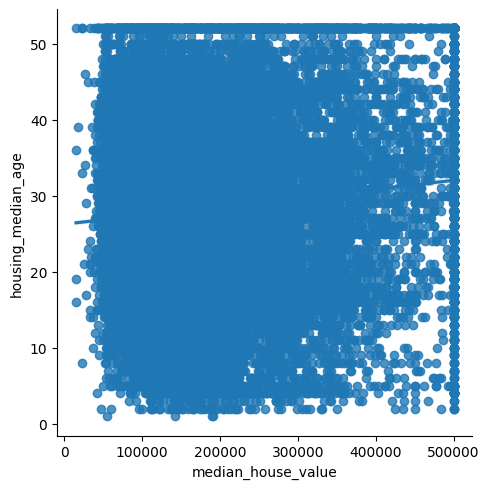

In [49]:
sns.lmplot(x='median_house_value',y='housing_median_age',data=data)
plt.show()

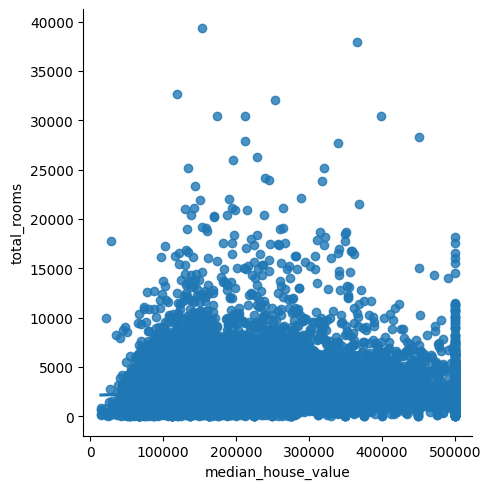

In [50]:
sns.lmplot(x='median_house_value',y='total_rooms',data=data)
plt.show()

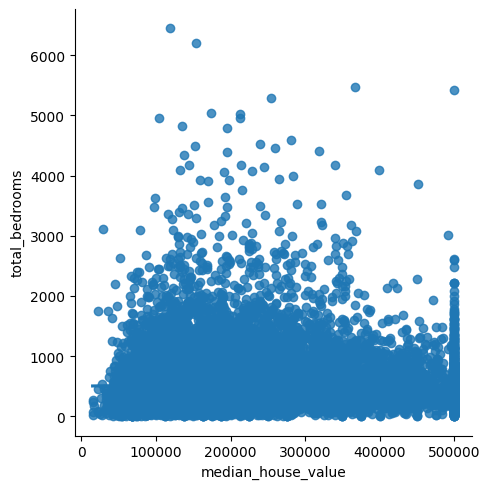

In [51]:
sns.lmplot(x='median_house_value',y='total_bedrooms',data=data)
plt.show()

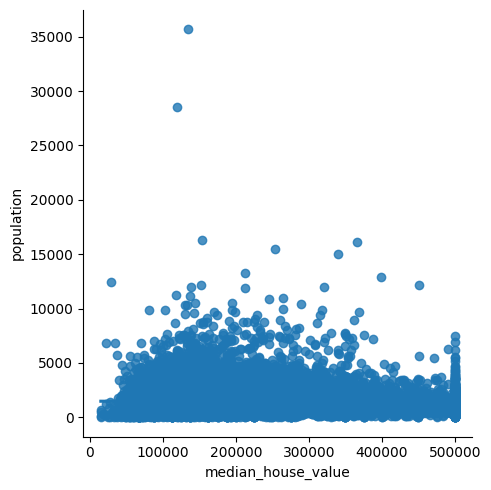

In [52]:
sns.lmplot(x='median_house_value',y='population',data=data)
plt.show()

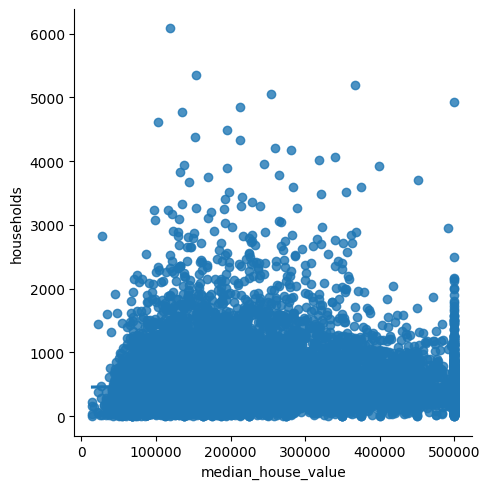

In [53]:
sns.lmplot(x='median_house_value',y='households',data=data)
plt.show()

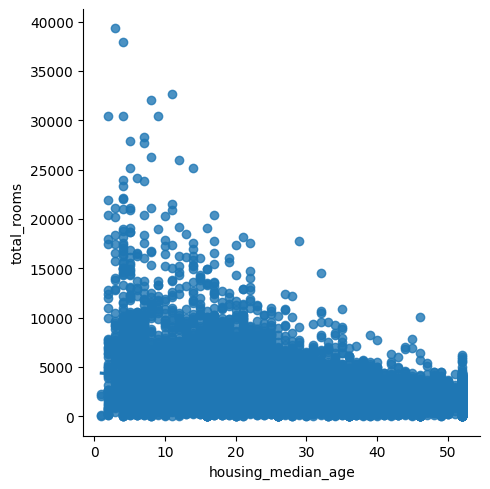

In [54]:
sns.lmplot(x='housing_median_age',y='total_rooms',data=data)
plt.show()

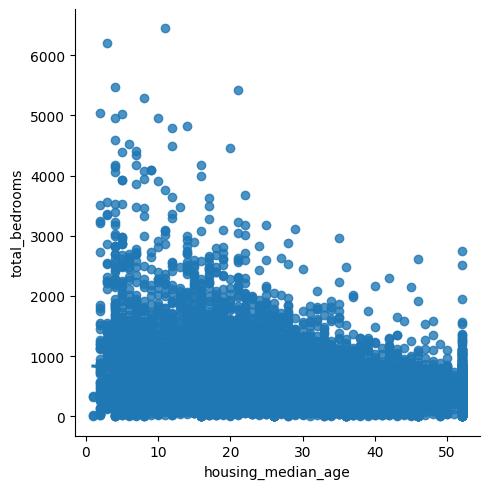

In [55]:
sns.lmplot(x='housing_median_age',y='total_bedrooms',data=data)
plt.show()

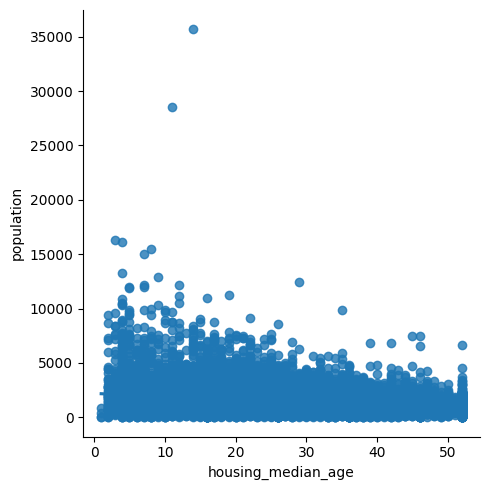

In [56]:
sns.lmplot(x='housing_median_age',y='population',data=data)
plt.show()

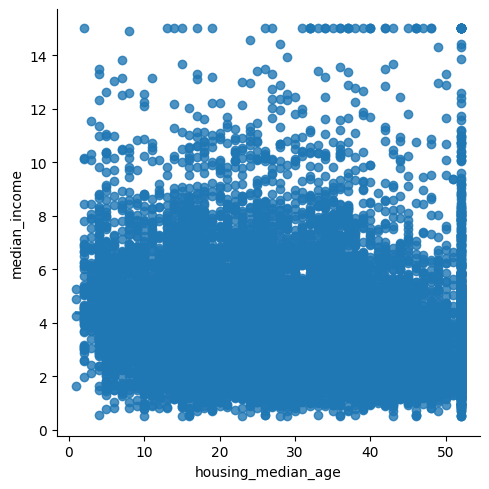

In [57]:
sns.lmplot(x='housing_median_age',y='median_income',data=data)
plt.show()

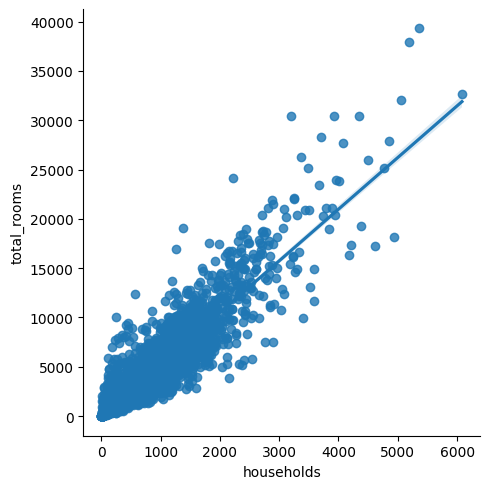

In [58]:
sns.lmplot(x='households',y='total_rooms',data=data)
plt.show()

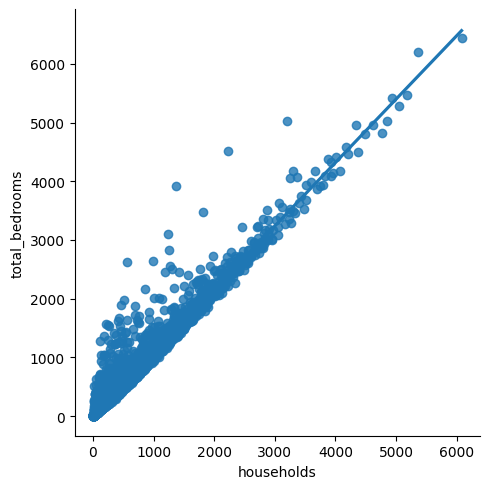

In [59]:
sns.lmplot(x='households',y='total_bedrooms',data=data)
plt.show()

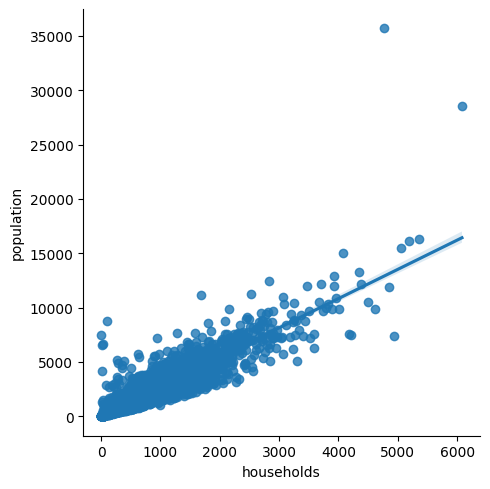

In [60]:
sns.lmplot(x='households',y='population',data=data)
plt.show()

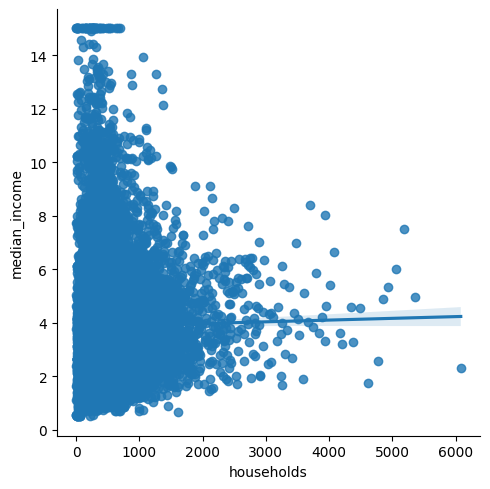

In [61]:
sns.lmplot(x='households',y='median_income',data=data)
plt.show()

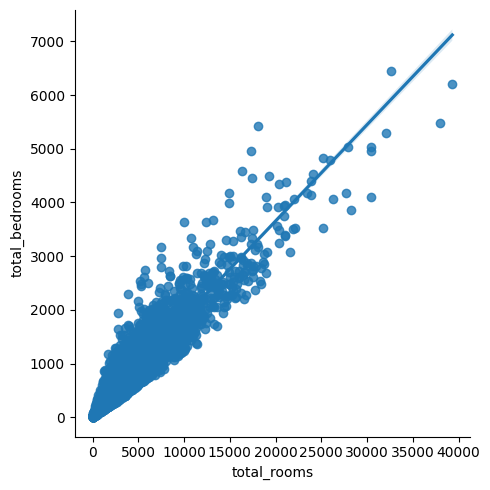

In [62]:
sns.lmplot(x='total_rooms',y='total_bedrooms',data=data)
plt.show()

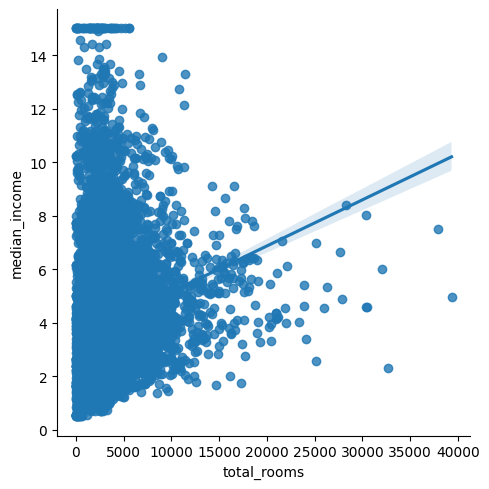

In [63]:
sns.lmplot(x='total_rooms',y='median_income',data=data)
plt.show()

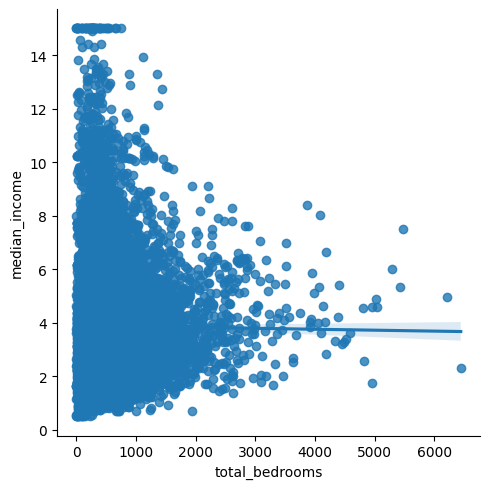

In [64]:
sns.lmplot(x='total_bedrooms',y='median_income',data=data)
plt.show()

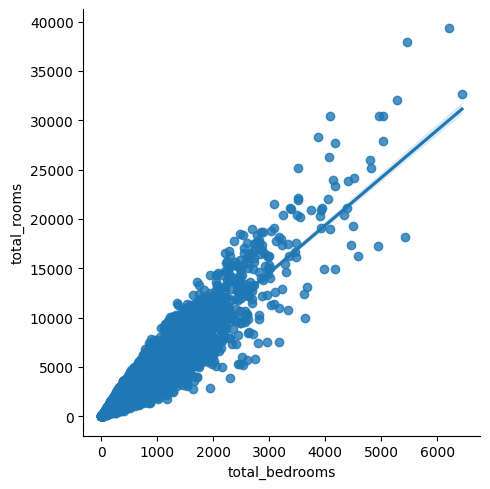

In [65]:
sns.lmplot(x='total_bedrooms',y='total_rooms',data=data)
plt.show()

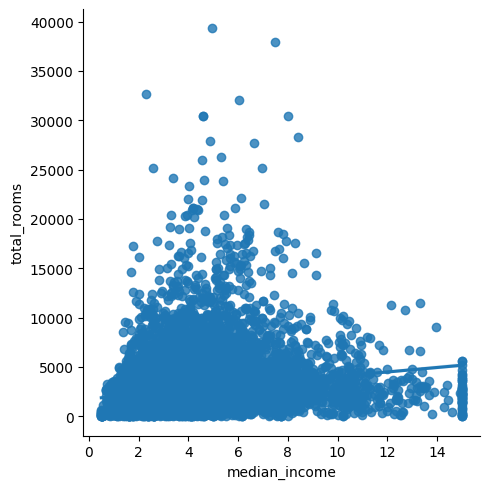

In [66]:
sns.lmplot(x='median_income',y='total_rooms',data=data)
plt.show()

In [67]:
#Regresión Lineal
modelo = smf.ols('median_house_value ~ longitude + latitude + housing_median_age + total_rooms + total_bedrooms + population + households + median_income', data=data).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     4478.
Date:                Wed, 28 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:28:19   Log-Likelihood:            -2.5682e+05
No. Observations:               20433   AIC:                         5.137e+05
Df Residuals:                   20424   BIC:                         5.137e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3.585e+06   6.29

In [68]:
#1.Coeficiente de determinación
# R-squared: 0.637
# El modelo es capaz de explicar al 63.7% de la variabilidad observada en las ventas.

# Adj. R-squared: 0.637
# El modelo es capaz de explicar al 63.7% de la variabilidad observada en las ventas.

#2.Prueba ANOVA
#Ho: b0=b1=b2=b3=0
#Ha: al menos un bi != 0

#Prob (F-statistic): 0.0
#=> Como el pvalor < 5%, se rechaza la hipótesis nula (Ho)
#al 95% de confianza, el modelo es significativo.

#3.Prueba t para coeficientes
#Ho: bi=0
#Ha: bi!=0

##P-value = 0.0 para todos los coeficientes del modelo,
#=> Como el pvalor < 5%, se rechaza la hipótesis nula (Ho),
#al 95% de confianza, los coeficientes del modelo son significativos.

#4.Supuestos del modelo

#a.Linealidad
#=> Supuesto 1 demostrado => ok

#b.Independencia de errores
#=> DW = 0.975, como este valor no se encuentra entre 1.5 y 2.5 no se cumple el supuesto

In [69]:
#c.Homocedasticidad
#Ho: Las varianzas de los errores son constantes
#Ha: Las varianzas de los errores no son constantes

In [70]:
nombres = ['estadística del multiplicador de Lagrange', 'valor p','valor f', 'valor p f']
test = sms.het_breuschpagan(modelo.resid, modelo.model.exog)
[nombres[1],test[1]]

['valor p', 7.0688972863721675e-155]

In [71]:
#=> Pvalor = 3.89243637131084e-121
#=> Como el pvalor < 5%, se rechaza la hipótesis nula (Ho),
#al 95% de confianza, Las varianzas de los errores son constantes => ok

In [72]:
#d.Normalidad de errores
#Ho: Los errores se aproximan a un distribución normal
#Ha: Los errores no se aproximan a un distribución normal

#=> Prob(JB) = 0.0
#=> Como el pvalor < 5%, se rechaza la hipótesis nula (Ho),
#al 95% de confianza, los errores se aproximan a un distribución normal => ok

#e.Multicolinealidad
#Supuesto 5 demostrado => ok

In [73]:
#Coeficientes del modelo
modelo.params

Intercept            -3.585396e+06
longitude            -4.273012e+04
latitude             -4.250974e+04
housing_median_age    1.157900e+03
total_rooms          -8.249725e+00
total_bedrooms        1.138207e+02
population           -3.838558e+01
households            4.770135e+01
median_income         4.029752e+04
dtype: float64

In [74]:
#Interpretación de coeficientes
#Ventas = 143902.179255 + -54.579724population + 1700.582526housing_median_age + 2.639268total_rooms

#population => -54.579724, por cada 1000 soles que se invierte en una propiedad con mayor población,
#El valor de las casas dismunyen en promedio -54.57 dólares.

#housing_median_age => 1700.582526, por menor antiguedad de la casas,
#El valor de las casas aumenta en promedio 1700.58 dólares.

#total_rooms => 34.924214, por cada habitación adicional,
#El valor de las casas aumenta en promedio 34.92 dólares.

In [75]:
#Error del modelo
#A menor valor, el modelo es más adecuado
modelo.mse_resid

4840189708.743854

In [76]:
#Intervalos de confianza para los coeficientes
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
Intercept,-3.708686e+06,-3.462106e+06
longitude,-4.413567e+04,-4.132457e+04
latitude,-4.383662e+04,-4.118286e+04
housing_median_age,1.072855e+03,1.242945e+03
total_rooms,-9.806540e+00,-6.692910e+00
total_bedrooms,1.002362e+02,1.274052e+02
population,-4.051054e+01,-3.626061e+01
households,3.290950e+01,6.249320e+01
median_income,3.963657e+04,4.095847e+04


In [77]:
#Predicciones
predicciones = modelo.predict(exog = data)
predicciones.head(4)

0    411270.207460
1    415943.955275
2    380534.163321
3    322246.854897
dtype: float64